In [89]:
from numpy import genfromtxt
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import binary_opening, binary_closing,binary_erosion, rectangle, binary_dilation, disk
from skimage.segmentation import find_boundaries

# From Converted RJPEG To Temperature csv

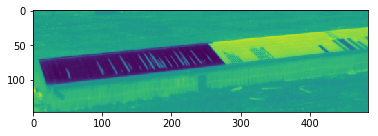

In [258]:
thermal_tab = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.csv', delimiter=',')
thermal_tab = np.rot90(thermal_tab,3)
# exclude the bottom right column because of some noise
thermal_tab = thermal_tab[0:147,0:485]
plt.figure()
plt.imshow(thermal_tab)

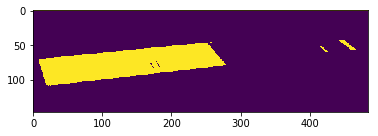

In [259]:
th = cv2.threshold(thermal_tab,19,255,cv2.THRESH_BINARY)[1]
thresholded = th.astype(np.uint8)
thresholded = np.invert(thresholded)
plt.figure()
plt.imshow(thresholded)

In [260]:
thresholded = binary_dilation(thresholded, rectangle(1,5))

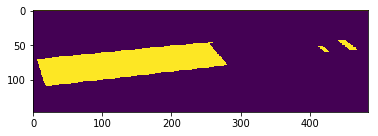

In [261]:
plt.figure()
plt.imshow(thresholded)

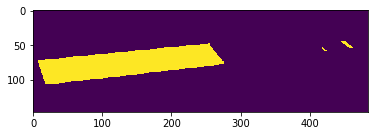

In [262]:
thresholded = binary_erosion(thresholded, rectangle(5,1))
plt.figure()
plt.imshow(thresholded)

In [273]:
# borders = find_boundaries(thresholded)
# plt.figure()
# plt.imshow(borders)

In [96]:
#print(borders)

In [263]:
thresholded_2 = thresholded.astype(np.uint8)
contours, hierarchy = cv2.findContours(thresholded_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### Create RGB images

In [265]:
thermal_im = 255*(thermal_tab - np.min(thermal_tab))/np.ptp(thermal_tab).astype(int)

In [266]:
thermal_im = cv2.cvtColor(thermal_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)

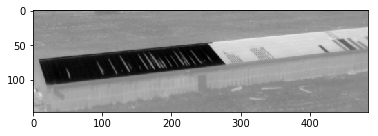

In [267]:
plt.figure()
plt.imshow(thermal_im)

In [270]:
mask = np.zeros(thermal_im.shape, np.uint8)
borders_im = cv2.drawContours(mask, contours, -1, (255,0,0),3)

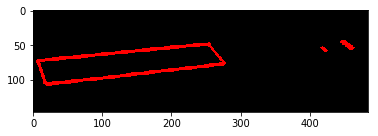

In [272]:
plt.figure()
plt.imshow(borders_im)

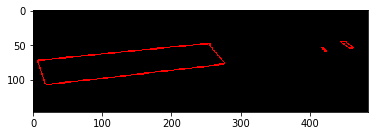

In [100]:
# borders_im = borders*255
# borders_im= cv2.cvtColor(borders_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)
# # Red color
# borders_im[:, :, (1, 2)] = 0
# plt.figure()
# plt.imshow(borders_im)

#### superimpose images


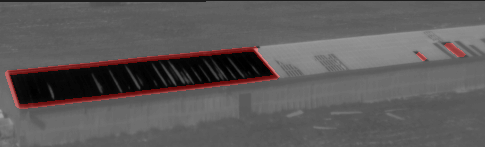

In [281]:
thermal_im_1 = Image.fromarray(thermal_im)
borders_im_1 = Image.fromarray(borders_im)
thermal_im_1 = thermal_im_1.convert("RGBA")
borders_im_1 = borders_im_1.convert("RGBA")
new_img = Image.blend(thermal_im_1, borders_im_1, 0.35)
new_img

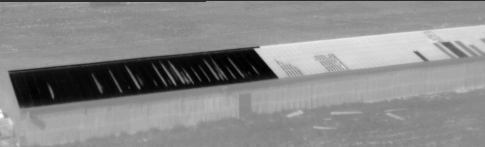

In [282]:
thermal_im_1

In [283]:
new_img_jpeg = new_img.convert("RGB")

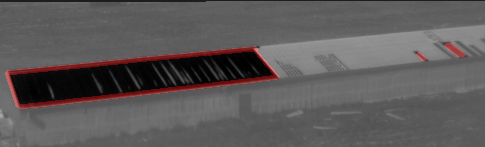

In [284]:
new_img_jpeg

In [285]:
new_img_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2_seg.jpeg')


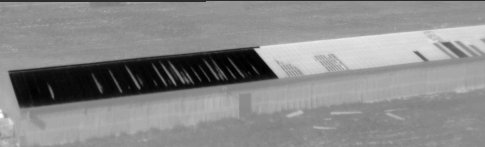

In [286]:
thermal_im_1_jpeg = thermal_im_1.convert("RGB")
thermal_im_1_jpeg

In [287]:
thermal_im_1_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.jpeg')


# From Converted TIFF to PNG

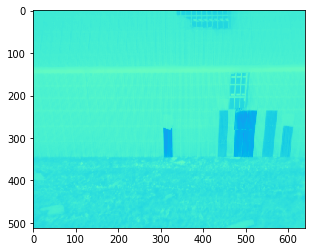

In [236]:
im_path_png = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal_png_rainbow/DJI_0168.tif.png"
thermal_png = Image.open(im_path_png)
plt.figure()
plt.imshow(thermal_png)

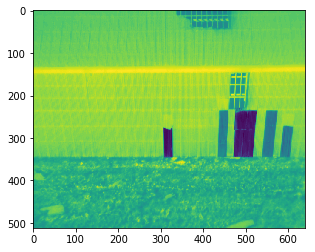

In [237]:
from matplotlib import pyplot as plt
r, g, b, _ = thermal_png.split()

ra = np.array(r)
ga = np.array(g)
ba = np.array(b)

gray = (0.299*ra + 0.587*ga + 0.114*ba)

plt.figure()
plt.imshow(gray)


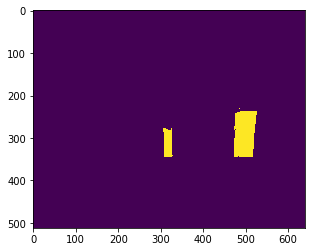

In [238]:
th = cv2.threshold(gray,148,255,cv2.THRESH_BINARY)[1]
thresholded = th.astype(np.uint8)
thresholded = np.invert(thresholded)
plt.figure()
plt.imshow(thresholded)

In [239]:
thresholded = binary_dilation(thresholded, rectangle(1,5))

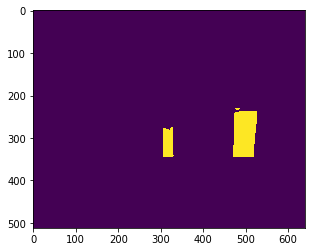

In [240]:
plt.figure()
plt.imshow(thresholded)

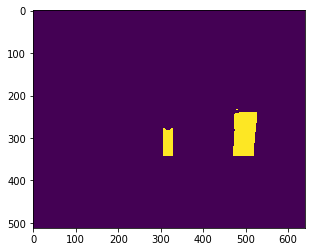

In [241]:
thresholded = binary_erosion(thresholded, rectangle(5,1))
plt.figure()
plt.imshow(thresholded)

In [242]:
# borders = find_boundaries(thresholded,connectivity=1)
# plt.figure()
# plt.imshow(borders)

In [244]:
thresholded_2 = thresholded.astype(np.uint8)
contours, hierarchy = cv2.findContours(thresholded_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### Create RGB images

In [245]:
thermal_im = cv2.cvtColor(gray.astype(np.uint8),cv2.COLOR_GRAY2RGB)

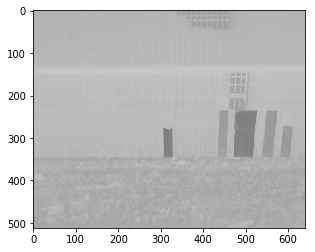

In [246]:
plt.figure()
plt.imshow(thermal_im)

In [248]:
mask = np.zeros(thermal_im.shape, np.uint8)
borders_im = cv2.drawContours(mask, contours, -1, (255,0,0),3)

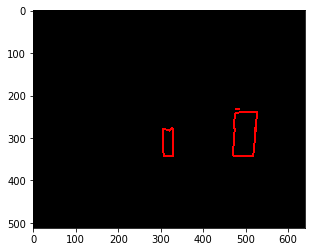

In [249]:
plt.figure()
plt.imshow(borders)

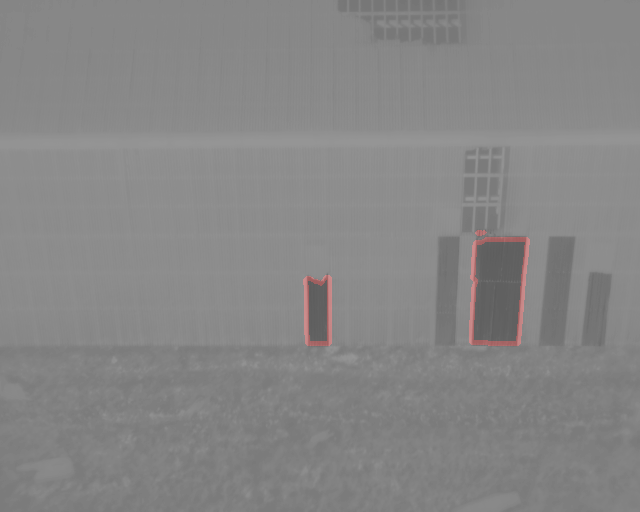

In [251]:
thermal_im_1 = Image.fromarray(thermal_im)
borders_im_1 = Image.fromarray(borders_im)
thermal_im_1 = thermal_im_1.convert("RGBA")
borders_im_1 = borders_im_1.convert("RGBA")
new_img = Image.blend(thermal_im_1, borders_im_1, 0.25)
new_img

In [252]:
new_img_jpeg = new_img.convert("RGB")

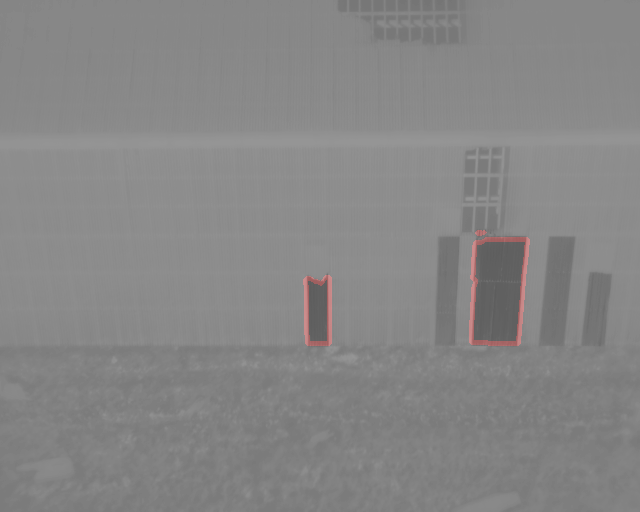

In [253]:
new_img_jpeg

In [255]:

new_img_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/DJI_0168_seg.jpeg')


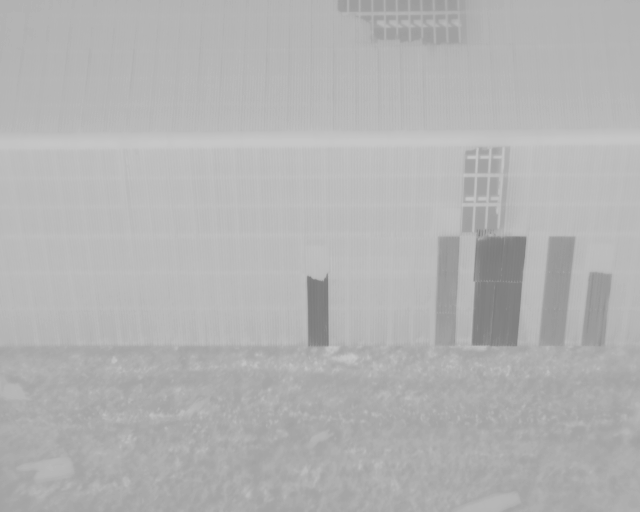

In [256]:
thermal_im_1_jpeg = thermal_im_1.convert("RGB")
thermal_im_1_jpeg

In [257]:
thermal_im_1_jpeg.save('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/DJI_0168.jpeg')
